# <center><i><u>Heart Disease Prediction

## About the Dataset
1. age (#)
2. sex : 1= Male, 0= Female (Binary)
3. (cp)chest pain type (4 values -Ordinal):Value 1: typical angina ,Value 2: atypical angina, Value 3: non-anginal pain , Value 4: asymptomatic
4. (trestbps) resting blood pressure (#)
5. (chol) serum cholesterol in mg/dl (#)
6. (fbs)fasting blood sugar > 120 mg/dl(Binary)(1 = true; 0 = false)
7. (restecg) resting electrocardiography results(values 0,1,2)
8. (thalach) maximum heart rate achieved (#)
9. (exang) exercise induced angina (binary) (1 = yes; 0 = no)
10. (oldpeak) = ST depression induced by exercise relative to rest (#)
11. (slope) of the peak exercise ST segment (Ordinal) (Value 1: up sloping , Value 2: flat , Value 3: down sloping )
12. (ca) number of major vessels (0–3, Ordinal) colored by fluoroscopy
13. (thal) maximum heart rate achieved — (Ordinal): 3 = normal; 6 = fixed defect; 7 = reversible defect

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import accuracy_score,classification_report,RocCurveDisplay,confusion_matrix,roc_curve,roc_auc_score,auc
import pickle

In [2]:
heart = pd.read_csv('./heart.csv')
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [3]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [4]:
heart.shape

(1025, 14)

In [5]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
heart.isnull().mean()*100

age         0.0
sex         0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalach     0.0
exang       0.0
oldpeak     0.0
slope       0.0
ca          0.0
thal        0.0
target      0.0
dtype: float64

In [7]:
heart.duplicated().sum()

723

In [8]:
heart['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

### <u>Exploratory Data Analysis

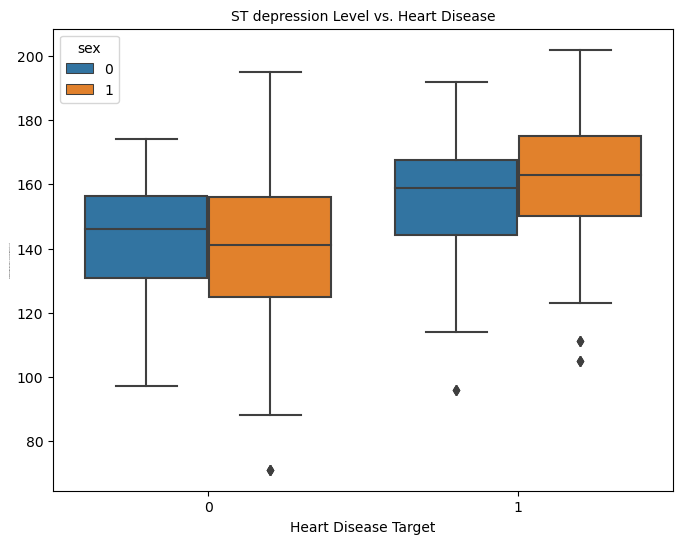

In [9]:
plt.figure(figsize=(8,6))
sns.boxplot(x= 'target', y= 'thalach',hue="sex", data=heart )
plt.title("ST depression Level vs. Heart Disease", fontsize=10)
plt.xlabel("Heart Disease Target",fontsize=10)
plt.ylabel("ST depression induced by exercise relative to rest", fontsize=0)
plt.show()

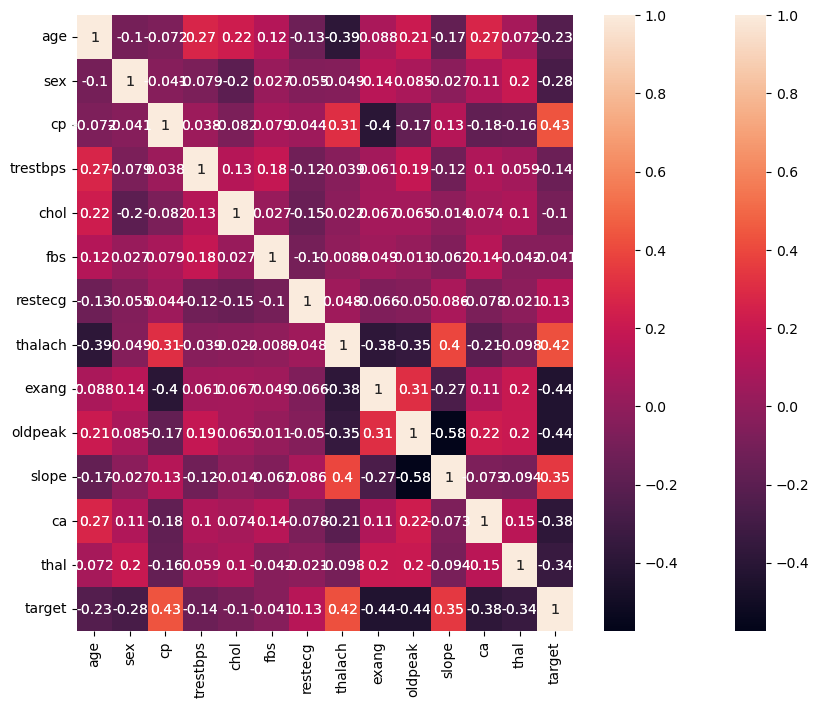

In [10]:
corr = heart.corr()
plt.subplots(figsize=(10,8))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, )
sns.heatmap(corr, xticklabels=corr.columns,
            yticklabels=corr.columns, 
            annot=True,
            )
plt.show()

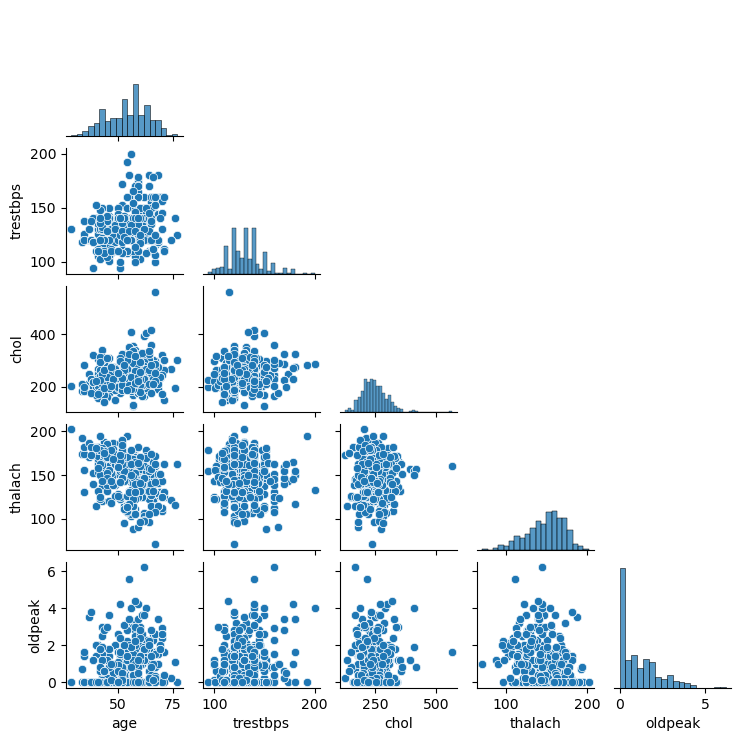

In [11]:
df= heart[['age','trestbps','chol','thalach','oldpeak']]
sns.pairplot(df,corner=True, height=1.5)
plt.show()

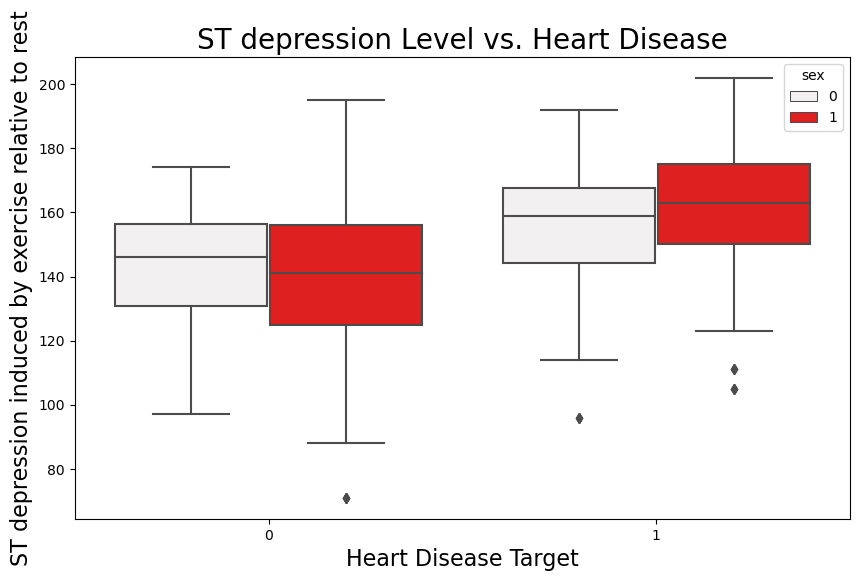

In [12]:
plt.figure(figsize=(10,6))
sns.boxplot(x= 'target', y= 'thalach',hue="sex", data=heart,color='red' )
plt.title("ST depression Level vs. Heart Disease", fontsize=20)
plt.xlabel("Heart Disease Target",fontsize=16)
plt.ylabel("ST depression induced by exercise relative to rest", fontsize=16)
plt.show()

 ##### ST depression :ST depression refers to a finding on an electrocardiogram, wherein the trace in the ST segment is abnormally low below the baseline.

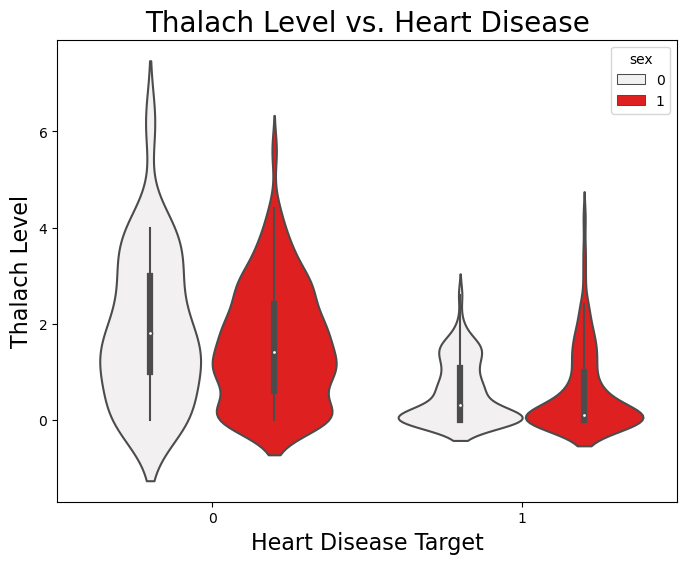

In [13]:
plt.figure(figsize=(8,6))
sns.violinplot(x= 'target', y= 'oldpeak',hue="sex", data= heart ,color='red')
plt.title("Thalach Level vs. Heart Disease",fontsize=20)
plt.xlabel("Heart Disease Target", fontsize=16)
plt.ylabel("Thalach Level", fontsize=16)
plt.show()

### Filtering data by positive & negative Heart Disease patient

#### POSITIVE Heart Disease patient

In [14]:
pos_data = heart[heart['target']==1]
pos_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
10,71,0,0,112,149,0,1,125,0,1.6,1,0,2,1
12,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
15,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
16,51,0,2,140,308,0,0,142,0,1.5,2,1,2,1


#### NEGATIVE Heart Disease patient

In [15]:
neg_data = heart[heart['target']==0]
neg_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### Data Modelling

In [16]:
x = heart.iloc[:, :-1].values
y = heart.iloc[:, -1].values

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 1)

In [18]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [19]:
print("Shape of x_train  :",x_train.shape)
print("Shape of x_test   :",x_test.shape)
print("Shape of y_train  :",y_train.shape)
print("Shape of y_test   :",y_test.shape)

Shape of x_train  : (820, 13)
Shape of x_test   : (205, 13)
Shape of y_train  : (820,)
Shape of y_test   : (205,)


In [20]:
models = {
   "LogisticRegression" : LogisticRegression(),
   "DecisionTreeClassifier"     : DecisionTreeClassifier(),
   "RandomForestClassifier"     : RandomForestClassifier(),
   "KNeighborsClassifier"       : KNeighborsClassifier(),
   "GradientBoostingClassifier" : GradientBoostingClassifier(),
   "AdaBoostClassifier"         : AdaBoostClassifier(),
    'GaussianNB'                :GaussianNB(),
    'XGBClassifier'             :XGBClassifier()
}

In [21]:
for name,model in models.items():
    score = cross_val_score(model,x,y,scoring="accuracy",cv =10,n_jobs=-1 )
    print("Cross Validation  :{}".format(name))
    print("Mean Score        : ",np.mean(score)*100)
    print("-"*100)

Cross Validation  :LogisticRegression
Mean Score        :  83.89301351608604
----------------------------------------------------------------------------------------------------
Cross Validation  :DecisionTreeClassifier
Mean Score        :  100.0
----------------------------------------------------------------------------------------------------
Cross Validation  :RandomForestClassifier
Mean Score        :  99.70588235294117
----------------------------------------------------------------------------------------------------
Cross Validation  :KNeighborsClassifier
Mean Score        :  75.99466971254522
----------------------------------------------------------------------------------------------------
Cross Validation  :GradientBoostingClassifier
Mean Score        :  97.07405292213973
----------------------------------------------------------------------------------------------------
Cross Validation  :AdaBoostClassifier
Mean Score        :  89.36131734247098
---------------------------

#### <i>The XGBoost Classifier and DecisionTreeClassifier achieved a perfect accuracy of 100%. This is quite impressive, but it's essential to ensure the model's evaluation is not over-optimistic and that there's no data leakage or other issues. The Random Forest Classifier  also achieved a very high accuracy .

### Here we are doing model selection in Classifier with more than 90 %accuracy

### Model 1. <u>XGBClassifier

In [22]:
xgb = XGBClassifier(random_state=1)  # Create an instance of the XGBoost classifier
xgb.fit(x_train, y_train)  # Train/Fit the model

y_pred = xgb.predict(x_test)  # Get predicted labels
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       109
           1       1.00      1.00      1.00        96

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



In [23]:
xgb.fit(x_train,y_train)
print("Model Trained with {}".format(name))
score_train = accuracy_score(y_train,xgb.predict(x_train))
score_test = accuracy_score(y_test,xgb.predict(x_test))
confussion_train = confusion_matrix(y_train,xgb.predict(x_train))
confussion_test = confusion_matrix(y_train,xgb.predict(x_train))
print("Model accuracy on train is:",score_train)
print("Model accuracy on test is :",score_test)
print("Confussion_matrix train is:",confussion_train)
print("Confussion_matrix test is :",confussion_test)
print("Wrong Predictions made:",(y_test !=xgb.predict(x_test)).sum(),'/',((y_test == xgb.predict(x_test)).sum()+(y_test != xgb.predict(x_test)).sum()))

Model Trained with XGBClassifier
Model accuracy on train is: 1.0
Model accuracy on test is : 1.0
Confussion_matrix train is: [[390   0]
 [  0 430]]
Confussion_matrix test is : [[390   0]
 [  0 430]]
Wrong Predictions made: 0 / 205


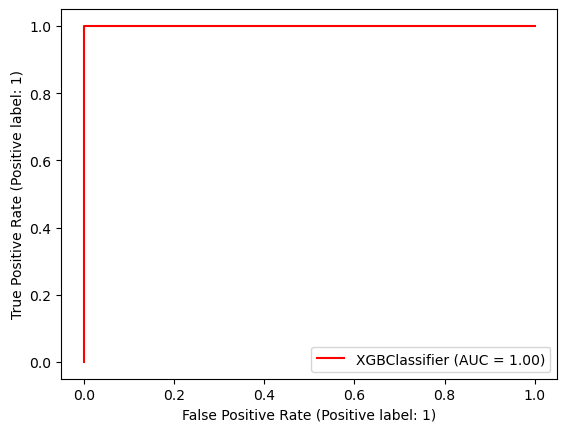

In [24]:
ROC_DISPLAY = RocCurveDisplay.from_estimator(xgb,x_test,y_test,color="red")

In [25]:
xgboutput = pd.DataFrame(zip(y_test,y_pred),columns=('actual','predicted'))
xgboutput

,actual,predicted
0,0,0
1,1,1
2,1,1
3,0,0
4,0,0
...,...,...
200,0,0
201,1,1
202,0,0
203,1,1


### Model 2. <u>RandomForestClassifier

In [26]:
rfc = RandomForestClassifier(random_state=1)  
rfc.fit(x_train, y_train)  # Train/Fit the model

y_pred1 = rfc.predict(x_test)  # Get predicted labels
print(classification_report(y_test, y_pred1)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       109
           1       1.00      1.00      1.00        96

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



In [27]:
rfc.fit(x_train,y_train)
print("Model Trained with {}".format(rfc))
score_train = accuracy_score(y_train,rfc.predict(x_train))
score_test = accuracy_score(y_test,rfc.predict(x_test))
confussion_train = confusion_matrix(y_train,rfc.predict(x_train))
confussion_test = confusion_matrix(y_train,rfc.predict(x_train))
print("Model accuracy on train is:",score_train)
print("Model accuracy on test is :",score_test)
print("Confussion_matrix train is:",confussion_train)
print("Confussion_matrix test is :",confussion_test)
print("Wrong Predictions made:",(y_test !=rfc.predict(x_test)).sum(),'/',((y_test == rfc.predict(x_test)).sum()+(y_test != rfc.predict(x_test)).sum()))

Model Trained with RandomForestClassifier(random_state=1)
Model accuracy on train is: 1.0
Model accuracy on test is : 1.0
Confussion_matrix train is: [[390   0]
 [  0 430]]
Confussion_matrix test is : [[390   0]
 [  0 430]]
Wrong Predictions made: 0 / 205


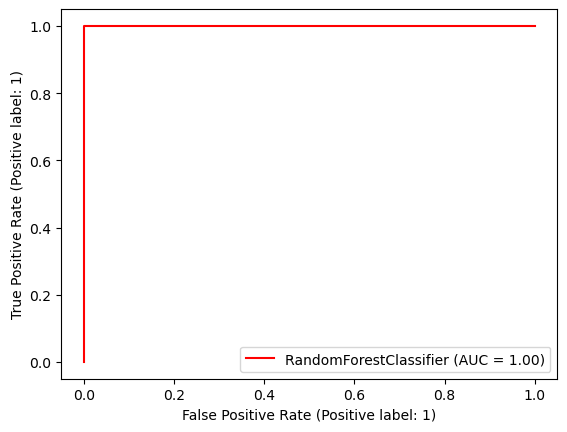

In [28]:
ROC_DISPLAY = RocCurveDisplay.from_estimator(rfc,x_test,y_test,color="red")

In [29]:
RFoutput = pd.DataFrame(zip(y_test,y_pred),columns=('actual','predicted'))
RFoutput

,actual,predicted
0,0,0
1,1,1
2,1,1
3,0,0
4,0,0
...,...,...
200,0,0
201,1,1
202,0,0
203,1,1


### Model 3. <u>DecisionTreeClassifier

In [30]:
dtc = DecisionTreeClassifier( )
dtc.fit(x_train, y_train)  # Train/Fit the model

DCy_pred = dtc.predict(x_test)  # Get predicted labels
print(classification_report(y_test, DCy_pred)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       109
           1       1.00      1.00      1.00        96

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



In [31]:
dtc.fit(x_train,y_train)
print("Model Trained with {}".format(dtc))
score_train = accuracy_score(y_train,dtc.predict(x_train))
score_test = accuracy_score(y_test,dtc.predict(x_test))
confussion_train = confusion_matrix(y_train,dtc.predict(x_train))
confussion_test = confusion_matrix(y_train,dtc.predict(x_train))
print("Model accuracy on train is:",score_train)
print("Model accuracy on test is :",score_test)
print("Confussion_matrix train is:",confussion_train)
print("Confussion_matrix test is :",confussion_test)
print("Wrong Predictions made:",(y_test !=dtc.predict(x_test)).sum(),'/',((y_test == dtc.predict(x_test)).sum()+(y_test != dtc.predict(x_test)).sum()))

Model Trained with DecisionTreeClassifier()
Model accuracy on train is: 1.0
Model accuracy on test is : 1.0
Confussion_matrix train is: [[390   0]
 [  0 430]]
Confussion_matrix test is : [[390   0]
 [  0 430]]
Wrong Predictions made: 0 / 205


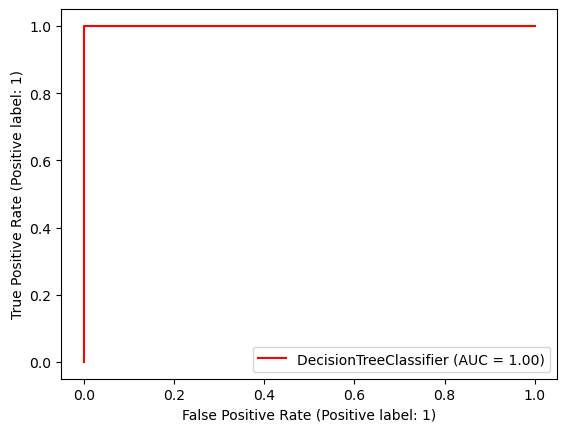

In [32]:
ROC_DISPLAY = RocCurveDisplay.from_estimator(dtc,x_test,y_test,color="red")

In [33]:
DCoutput = pd.DataFrame(zip(y_test,y_pred),columns=('actual','predicted'))
DCoutput

,actual,predicted
0,0,0
1,1,1
2,1,1
3,0,0
4,0,0
...,...,...
200,0,0
201,1,1
202,0,0
203,1,1


### Model 4. <u>GradientBoostingClassifier

In [34]:
gbc = GradientBoostingClassifier( )
gbc.fit(x_train, y_train)  # Train/Fit the model

DCy_pred = dtc.predict(x_test)  # Get predicted labels
print(classification_report(y_test, DCy_pred)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       109
           1       1.00      1.00      1.00        96

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



In [35]:
gbc.fit(x_train,y_train)
print("Model Trained with {}".format(gbc))
score_train = accuracy_score(y_train,gbc.predict(x_train))
score_test = accuracy_score(y_test,gbc.predict(x_test))
confussion_train = confusion_matrix(y_train,gbc.predict(x_train))
confussion_test = confusion_matrix(y_train,gbc.predict(x_train))
print("Model accuracy on train is:",score_train)
print("Model accuracy on test is :",score_test)
print("Confussion_matrix train is:",confussion_train)
print("Confussion_matrix test is :",confussion_test)
print("Wrong Predictions made:",(y_test !=gbc.predict(x_test)).sum(),'/',((y_test == gbc.predict(x_test)).sum()+(y_test != gbc.predict(x_test)).sum()))

Model Trained with GradientBoostingClassifier()
Model accuracy on train is: 0.9926829268292683
Model accuracy on test is : 0.9902439024390244
Confussion_matrix train is: [[384   6]
 [  0 430]]
Confussion_matrix test is : [[384   6]
 [  0 430]]
Wrong Predictions made: 2 / 205


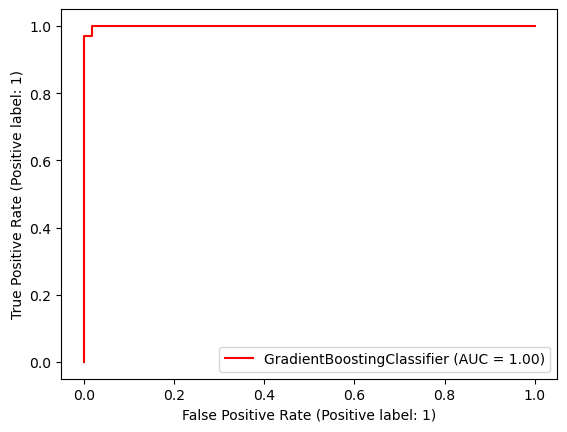

In [36]:
ROC_DISPLAY = RocCurveDisplay.from_estimator(gbc,x_test,y_test,color="red")

In [37]:
GBoutput = pd.DataFrame(zip(y_test,y_pred),columns=('actual','predicted'))
GBoutput

,actual,predicted
0,0,0
1,1,1
2,1,1
3,0,0
4,0,0
...,...,...
200,0,0
201,1,1
202,0,0
203,1,1


In [38]:
model_name = 'MODEL.pkl'
with open(model_name, 'wb') as file:
    pickle.dump(xgb,file)
